In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline


In [123]:
df = pd.read_csv('./vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [124]:
#chick the missing values
df.isna().sum()
#replac missing values of the years by 0
df.Year.fillna(value=0 , inplace=True)
#drop the rows with missing values of publisher
df.dropna(subset=['Publisher'], inplace=True)
df.isna().sum()

#removing Whitespace
columns = [1, 2, 4, 5]
result = map(lambda x: df.x.str.strip(), columns)

#changing the type of Year column from float to int
df['Year'] = df.Year.astype('int64')
df.dtypes

#sort according to years
df.sort_values('Year', ascending=True, inplace=True)

#chick for duplicate rows
print(df.drop_duplicates().size, df.size)
#the size is the same SO no duplicates rows


181940 181940


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

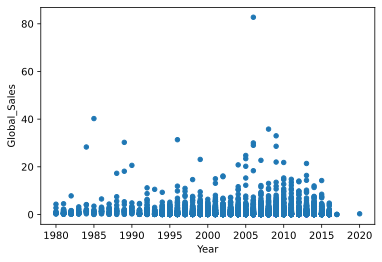

In [125]:

#chick for outlier values
#create Scatter Plot
df[df.Year != 0].plot.scatter(x='Year', y='Global_Sales')



<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

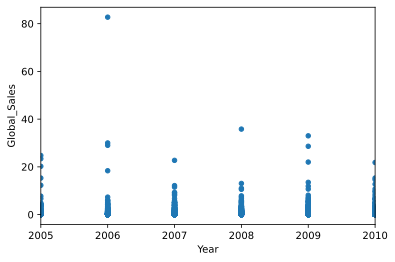

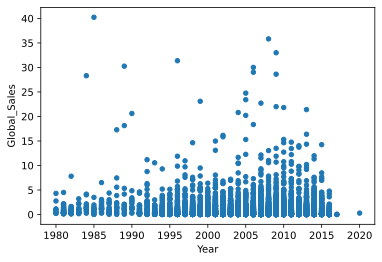

In [126]:
#scale to determine the specific "Year" of the outlier value on Global Sales
df[df.Year != 0].plot.scatter(x='Year', y='Global_Sales', xlim=(2005, 2010))

#from the scatter plot we determinte the outlier value is in the year 2006
#delet outlier
df = df[df.Global_Sales != 82.74]
df[df.Year != 0].plot.scatter(x='Year', y='Global_Sales')